# Team NameError - ADA Project milestone 2

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Supresses warnings
pd.options.mode.chained_assignment = None

sns.set_theme(style = "white")

# matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# nltk
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

# custom function
from functions import *

nltk.download('stopwords')
nltk.download('punct')
nltk.download('brown')

# dir paths
DATA_DIR = '../data'
IMG_DIR = '../img'
RAW_DATA_DIR = "../raw_data/"

[nltk_data] Downloading package stopwords to /home/romain/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading punct: Package 'punct' not found in index
[nltk_data] Downloading package brown to /home/romain/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [2]:
# loading the data
df = pd.read_json(f'{DATA_DIR}/fine_filtered2020_attrs.json.bz2', compression='bz2')

In [3]:
# Convert time
df['date'] = pd.to_datetime(df['date'])
# Take care of unknown values
df.replace('None', np.NaN, inplace=True)
# Get values out of lists
col_names = ['gender']#, 'nationality', 'ethnic_group', 'occupation', 'party', 'academic_degree', 'domains']
list_to_str(df, col_names)

In [4]:
# applying sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sentiment_analyzer = SentimentIntensityAnalyzer()


df['sentiment'] = df.apply(lambda row: get_sentiment(sentiment_analyzer, row.quotation), axis=1)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/milos/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [225]:
df

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,speaker_qid,gender,nationality,date_of_birth,ethnic_group,occupation,party,academic_degree,domains,sentiment
0,2020-02-13-100687,This diet focuses on lifelong changes to healt...,NaN,[],2020-02-13 18:22:19,1,"[[None, 0.8001], [Dr. Sebi, 0.1999]]",[https://parade.com/995529/christinperry/dr-se...,E,None,None,None,None,None,None,None,None,[parade.com],positive
1,2020-02-07-007719,"As an empowered female leader myself, I am thr...",NaN,[],2020-02-07 13:09:21,1,"[[None, 0.9507], [Maye Musk, 0.0493]]",[https://www.perishablenews.com/produce/celebr...,E,None,None,None,None,None,None,None,None,[perishablenews.com],positive
2,2020-01-21-098307,We stack the freshly plucked fruits into three...,Sahi Ram,[Q19605026],2020-01-21 12:49:00,1,"[[Sahi Ram, 0.9035], [None, 0.0965]]",[http://freshplaza.com/article/9181949/the-tin...,E,Q19605026,male,[India],[+1959-10-10T00:00:00Z],None,[politician],[Aam Aadmi Party],None,[freshplaza.com],neutral
3,2020-02-12-011869,Burger Burger will use local produce as much a...,NaN,[],2020-02-12 18:56:09,1,"[[None, 0.9078], [El Chapo, 0.0922]]",[https://www.belfastlive.co.uk/whats-on/food-d...,E,None,None,None,None,None,None,None,None,[belfastlive.co.uk],neutral
4,2020-01-07-042453,It's likely that as we're seeing drier conditi...,NaN,[],2020-01-07 23:40:00,2,"[[None, 0.9688], [Scott Morrison, 0.0312]]",[http://msn.com/en-au/news/australia/kookaburr...,E,None,None,None,None,None,None,None,None,"[msn.com, msn.com]",neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4267,2020-02-20-028821,I suppose because of my size and what I do for...,NaN,[],2020-02-20 19:00:00,2,"[[None, 0.7036], [Anthony Mullally, 0.2063], [...",[https://www.stuff.co.nz/sport/league/11967886...,E,None,None,None,None,None,None,None,None,"[stuff.co.nz, nzcity.co.nz]",positive
4268,2020-01-23-046052,In the early 2000s the City of Cedar Rapids wa...,Jason Andrews,"[Q22704361, Q55523316]",2020-01-23 13:00:05,1,"[[Jason Andrews, 0.8019], [None, 0.1981]]",[https://adventure.howstuffworks.com/outdoor-a...,E,None,None,None,None,None,None,None,None,[howstuffworks.com],positive
4269,2020-03-26-047830,People have mostly stayed in the last couple o...,Arvind Kejriwal,[Q59155],2020-03-26 09:10:20,2,"[[Arvind Kejriwal, 0.6215], [None, 0.3786]]",[https://www.newindianexpress.com/cities/delhi...,E,Q59155,male,[India],[+1968-08-16T00:00:00Z],None,"[politician, bureaucrat]",[Aam Aadmi Party],None,"[newindianexpress.com, newkerala.com]",positive
4270,2020-04-04-035826,We have been seeing reports of farmers dumping...,Narayana Gowda,[Q6965507],2020-04-04 00:38:36,1,"[[Narayana Gowda, 0.8262], [None, 0.1738]]",[http://www.bangaloremirror.com/bangalore/othe...,E,Q6965507,male,[India],[+1966-06-10T00:00:00Z],None,"[politician, activist]",[Janata Dal (Secular)],None,[bangaloremirror.com],negative


# Overview of the dataset
--------

Let's take a deep dive in data...

## Unknown speakers

In [7]:
is_speaker_known = df['speaker'].isna()
print('Number of quotes with known speaker:', is_speaker_known.apply(lambda x: not x).sum())
print('Number of quotes with unknown speaker:', (is_speaker_known).sum())

Number of quotes with known speaker: 2878
Number of quotes with unknown speaker: 1394


## Domain distribution

We want to take a look at our filtered quotes and see from which domains they are from (maybe just a small part talk about our topic).

In [20]:
quotes_by_domain = df['domains'].explode().value_counts()
quotes_by_domain.sort_values(ascending=False)[:20]

einnews.com             2752
msn.com                 2194
wokv.com                1532
news965.com             1098
indiatimes.com          1036
stuff.co.nz              932
eurekalert.org           898
wsbradio.com             889
breitbart.com            791
krmg.com                 745
miragenews.com           728
nzherald.co.nz           699
brisbanetimes.com.au     672
washingtontimes.com      663
express.co.uk            659
nzcity.co.nz             644
smh.com.au               643
foxnews.com              611
theage.com.au            610
itbusinessnet.com        589
Name: domains, dtype: int64

It would also be interesting to compare it with the distribution from the unfiltered dataset.

In [21]:
domains_all_df = pd.Series(dtype=str)
with pd.read_json(RAW_DATA_DIR+"quotes-2020.json.bz2", lines=True, compression='bz2', chunksize=50000) as df_reader:
    for chunk in df_reader:
        v = chunk['urls'].apply(lambda r: list(map(get_domain, r))).explode()
        domains_all_df = domains_all_df.add(v, fill_value="")

In [22]:
len(domains_all_df)

17057653

In [23]:
quotes_by_domain_all = domains_all_df.value_counts()
quotes_by_domain_all.sort_values(ascending=False)[:20]

einnews.com            267567
msn.com                241598
news965.com            127998
wokv.com               119616
breitbart.com           98428
washingtontimes.com     81833
wsbradio.com            77257
indiatimes.com          75690
nbcsports.com           72913
nytimes.com             70478
foxnews.com             66660
sfgate.com              64866
gamereactor.eu          57670
nbcnews.com             55788
smh.com.au              54683
newsok.com              54674
krmg.com                54602
stuff.co.nz             53072
timesofisrael.com       52930
news12.com              52282
dtype: int64

The next interesting analysis is looking at the percentage of quotes about our key words each domain has. 

In [24]:
quotes_by_domain_merged = pd.merge(
    quotes_by_domain.rename('filtered_quotes'),
    quotes_by_domain_all.rename('total_quotes'),
    how='left',
    left_index=True,
    right_index=True
)

quotes_by_domain_merged['ratio'] = quotes_by_domain_merged['filtered_quotes'] / quotes_by_domain_merged['total_quotes']
quotes_by_domain_merged.sort_values('ratio', ascending=False).head()

,filtered_quotes,total_quotes,ratio
gwdtoday.com,2,2,1.0
interiordesign.net,1,1,1.0
greenhousecanada.com,2,2,1.0
tokyoartbeat.com,1,1,1.0
mydigitalfc.com,1,1,1.0


Let's remove the domains with not a lot of total quotes (not really interesting).

In [25]:
thresh = 100  # we keep domains with more than thresh total quotes
quotes_by_domain_merged = quotes_by_domain_merged[quotes_by_domain_merged['total_quotes'] > thresh]
quotes_by_domain_merged.sort_values('ratio', ascending=False).head()

,filtered_quotes,total_quotes,ratio
vegnews.com,117,266,0.439850
onegreenplanet.org,89,247,0.360324
cartoonbrew.com,44,167,0.263473
foodingredientsfirst.com,58,223,0.260090
nationalhogfarmer.com,44,178,0.247191


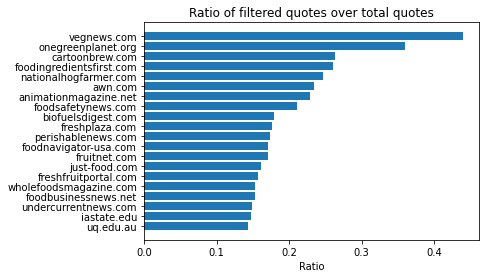

In [26]:
d = quotes_by_domain_merged['ratio'].sort_values(ascending=False)[:20].sort_values()

plt.barh(d.index, d)
plt.title("Ratio of filtered quotes over total quotes")
plt.xlabel("Ratio")
plt.show()

## Quote lengths

In [8]:
def count_words(sentence):
    # maybe use advanced features from NLTK
    return len(sentence.split())

In [12]:
sentence_lengths = df.apply(lambda row: count_words(row.quotation), axis=1).rename('length').reset_index()
sentence_lengths

,index,length
0,0,27
1,1,62
2,2,47
3,3,23
4,4,30
...,...,...
4267,4267,25
4268,4268,55
4269,4269,35
4270,4270,53


In [21]:
sentence_length_mean = sentence_lengths['length'].mean()
sentence_length_std = sentence_lengths['length'].std()

# 95% confidence interval (z = 1.96)
sentence_length_ci = 1.96 * sentence_length_std / len(sentence_lengths) ** .5

print(f'Average quote length is {sentence_length_mean} +- {sentence_length_ci} words')

Average quote length is 35.46184456928839 +- 0.8330940273786557 words


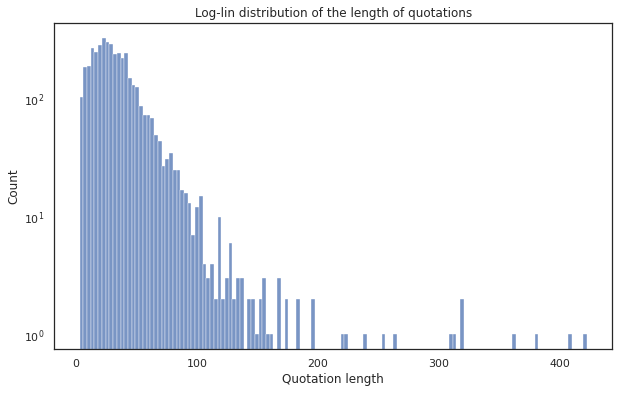

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=sentence_lengths, x='length', ax=ax)

ax.set_yscale('log')
ax.set(title='Log-lin distribution of the length of quotations', xlabel='Quotation length')

plt.show()

## Attribute distributions

[Text(0.5, 1.0, 'Distribution of genders'), Text(0.5, 0, 'Gender')]

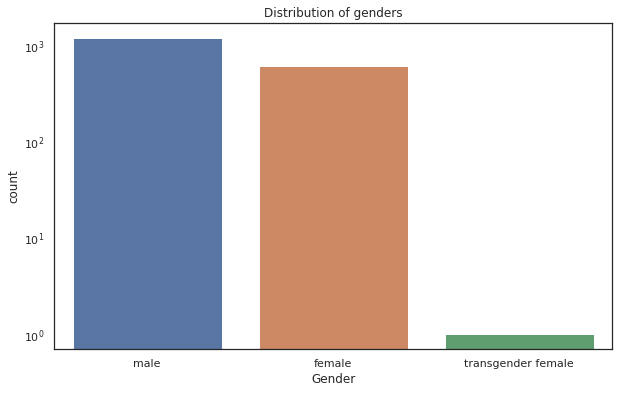

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=df, x='gender', ax=ax)
ax.set_yscale('log')
ax.set(title='Distribution of genders', xlabel='Gender')

In [89]:
# Plot distribution of top k values of the given attribute
def multi_attr_distribution(df, attr_name, ax, orient='h', k=10):
    # calculate top values
    not_nat_attr_values = df[attr_name].dropna()
    attr_value_counts = not_nat_attr_values.explode().value_counts().rename('count').reset_index()
    topk_value_counts = attr_value_counts[:k]
    # Make a batplot
    if orient == 'h':
        xcol, ycol = 'count', 'index'
    elif orient == 'v':
        ycol, xcol = 'count', 'index'
    sns.barplot(data=topk_value_counts, x=xcol, y=ycol, ax=ax, orient=orient)

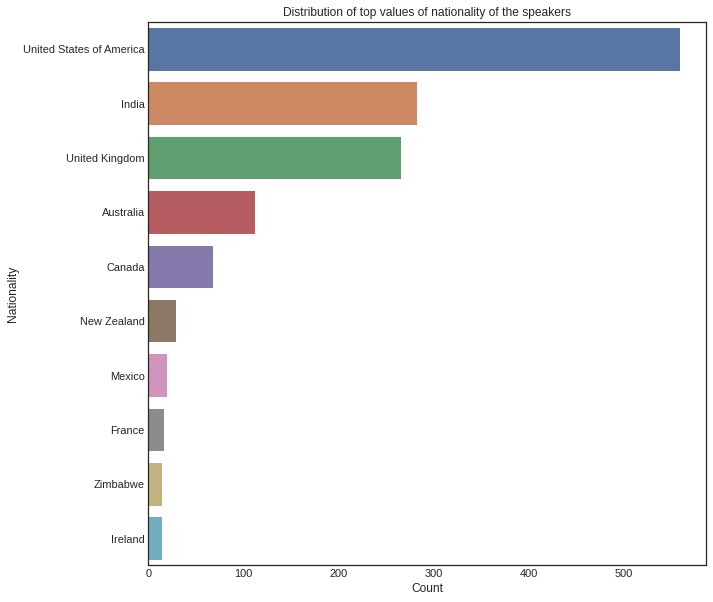

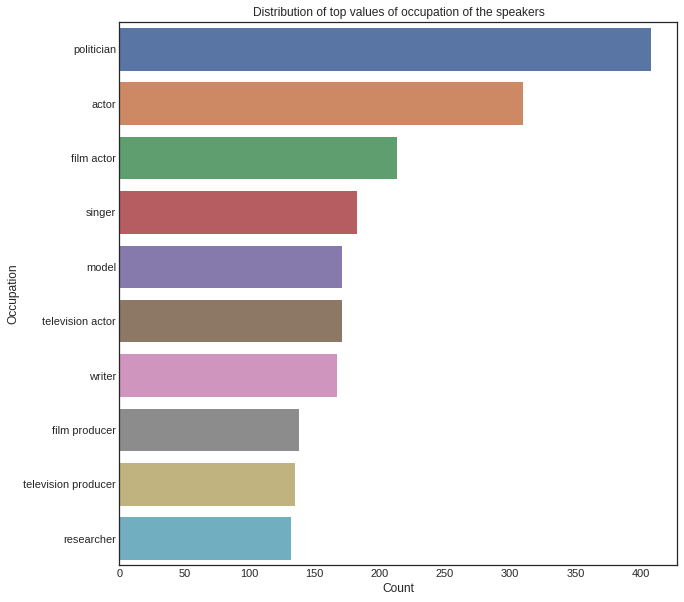

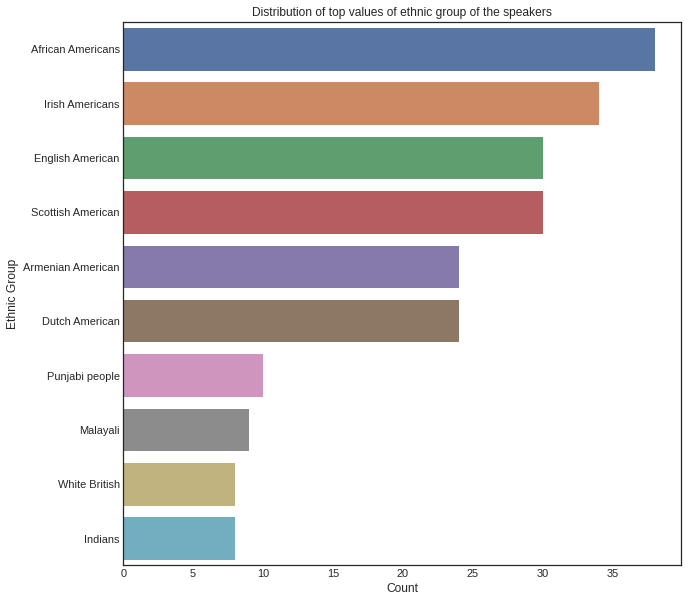

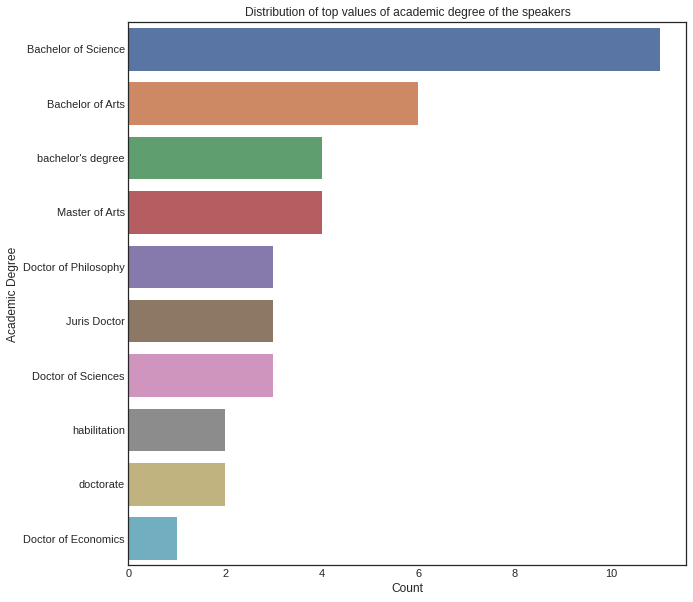

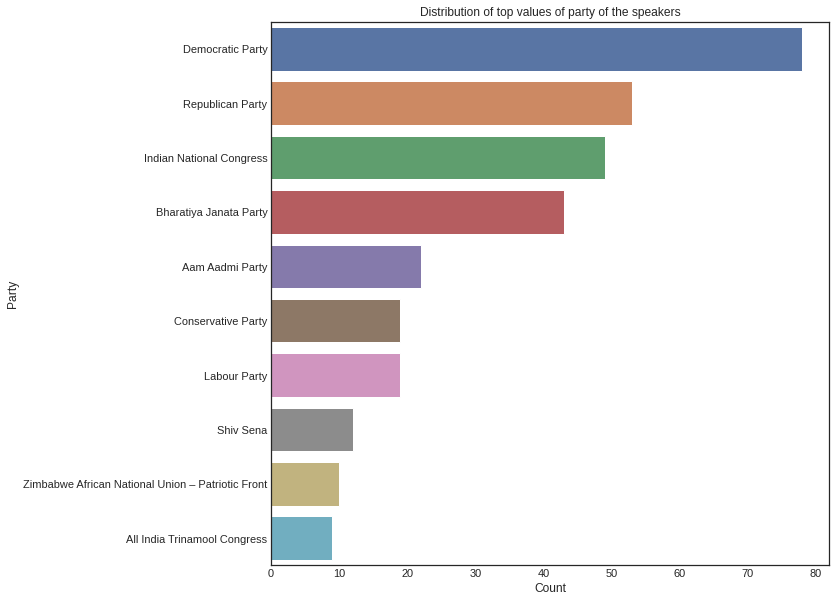

In [113]:
for index, attr_name in enumerate(['nationality', 'occupation', 'ethnic_group', 'academic_degree', 'party']):
    fig, ax = plt.subplots(figsize=(10, 10))
    
    readable_attr_name = attr_name.replace('_', ' ')
    
    multi_attr_distribution(df, attr_name, ax, orient='h', k=10)

    ax.set(title=f'Distribution of top values of {readable_attr_name} of the speakers', 
           xlabel='Count', 
           ylabel=readable_attr_name.title())
    plt.show()

## Quote distribution per month

[Text(0.5, 1.0, 'Number of quotations per month'), Text(0.5, 0, 'Month')]

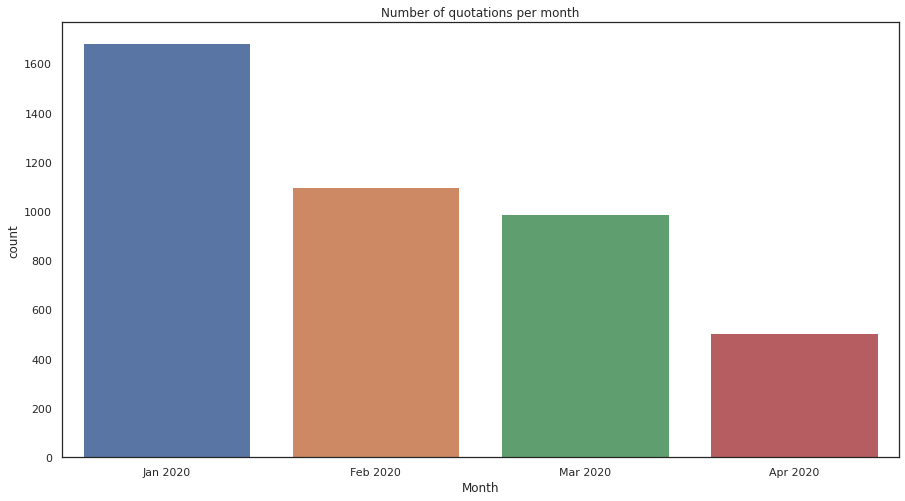

In [25]:
quotes_per_month = pd.to_datetime(df['date']).apply(lambda x: x.strftime('%b %Y')).rename('month').reset_index()

fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(data=quotes_per_month, x='month', ax=ax, order=['Jan 2020', 'Feb 2020', 'Mar 2020', 'Apr 2020'])

ax.set(title='Number of quotations per month', xlabel='Month')

# Sentiment Analysis
---

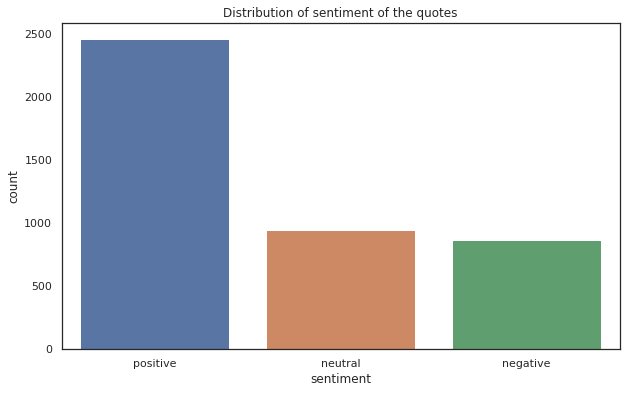

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=df, x='sentiment', ax=ax)

ax.set(title='Distribution of sentiment of the quotes')

plt.show()

In [28]:
time_distribution = pd.pivot_table(
    df.sort_values('date'),
    columns=['sentiment'],
    index=['date'],
    aggfunc=len
)['numOccurrences'].fillna(0) # numOccurrences irrelevant in the context, any column other than date would suffice

time_distribution

sentiment,negative,neutral,positive
date,,,
2020-01-01 00:00:00,0.0,0.0,1.0
2020-01-01 01:00:00,0.0,1.0,2.0
2020-01-01 01:11:00,0.0,0.0,1.0
2020-01-01 01:15:00,0.0,0.0,1.0
2020-01-01 05:00:00,0.0,0.0,1.0
...,...,...,...
2020-04-16 18:12:00,0.0,0.0,1.0
2020-04-16 19:27:40,1.0,0.0,0.0
2020-04-16 19:27:49,0.0,2.0,1.0


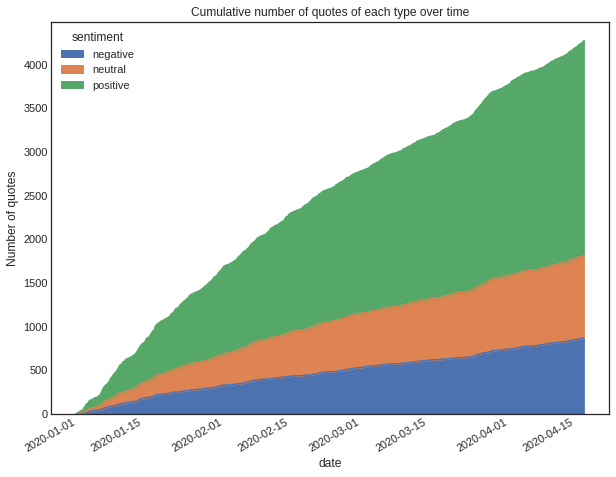

In [30]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.style.use('seaborn-white')

ax.set(title='Cumulative number of quotes of each type over time', xlabel='Date', ylabel='Number of quotes')
time_distribution.cumsum().plot.area(ax=ax)
plt.show()

Distribution of different attributes among sentiments:

In [148]:
def plot_sentiment_attribute_percentage(df, attr_name, ax):
    sentiment_attr_counts = df[['sentiment', attr_name]]\
        .pivot_table(index='sentiment', columns=attr_name, aggfunc=len)\
        .replace(np.NaN, 0)

    sentiment_attr_percentages = sentiment_attr_counts / sentiment_attr_counts.sum(axis=0)
    sentiment_attr_percentages.plot.bar(ax=ax)

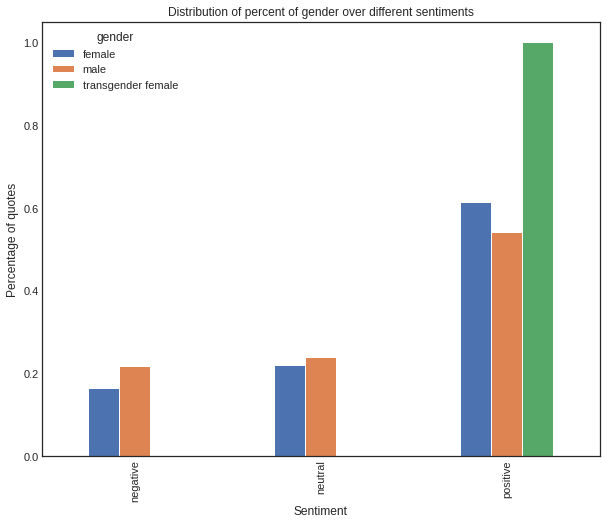

In [150]:
fig, ax = plt.subplots(figsize=(10, 8))
plot_sentiment_attribute_percentage(df, 'gender', ax=ax)
ax.set(title='Distribution of percent of gender over different sentiments',
      ylabel='Percentage of quotes',
      xlabel='Sentiment')
plt.show()

In [236]:
def weight_list_values(list_of_values):
#     print(list_of_values)
    if list_of_values:
        return 1 / len(list_of_values)
    else:
        return 0

def plot_sentiment_multivalue_attribute_percentage(df, attr_name, ax, k=10):
    attr_sentiment_df = df[[attr_name, 'sentiment']]
    # Raises warning which can be disabled
    attr_sentiment_df['weight'] = attr_sentiment_df\
        .apply(lambda row: weight_list_values(getattr(row, attr_name)), axis=1)
    exploded_pivot_table = attr_sentiment_df.explode(attr_name)\
        .pivot_table(index='sentiment', columns=attr_name, values='weight', aggfunc=sum)\
        .replace(np.NaN, 0)
    normalized_pivot_table = exploded_pivot_table / exploded_pivot_table.sum(axis=0)
    top_cols = list(exploded_pivot_table.sum(axis=0).sort_values(ascending=False)[:k].index)[::-1]
    normalized_pivot_table[top_cols].transpose().plot.barh(ax=ax)

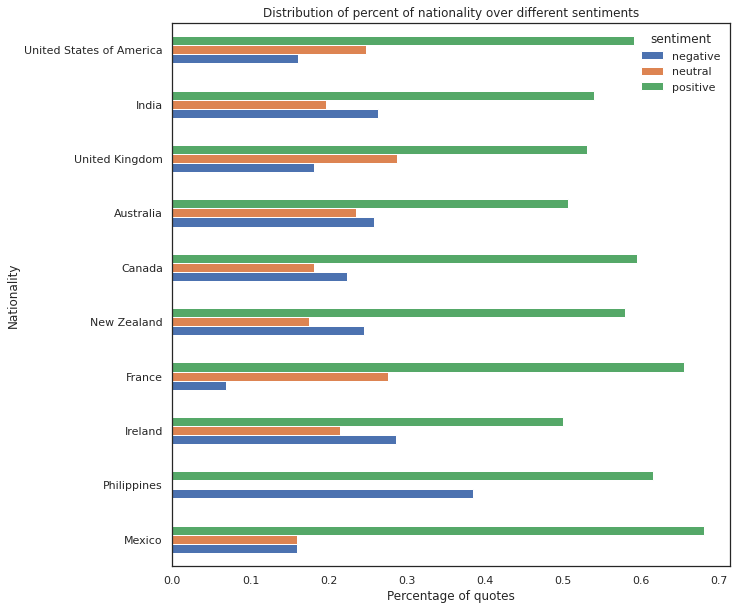

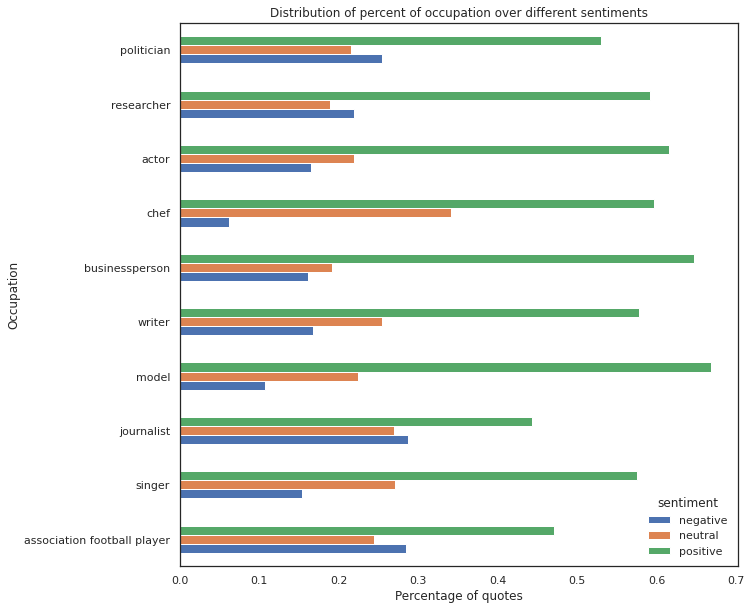

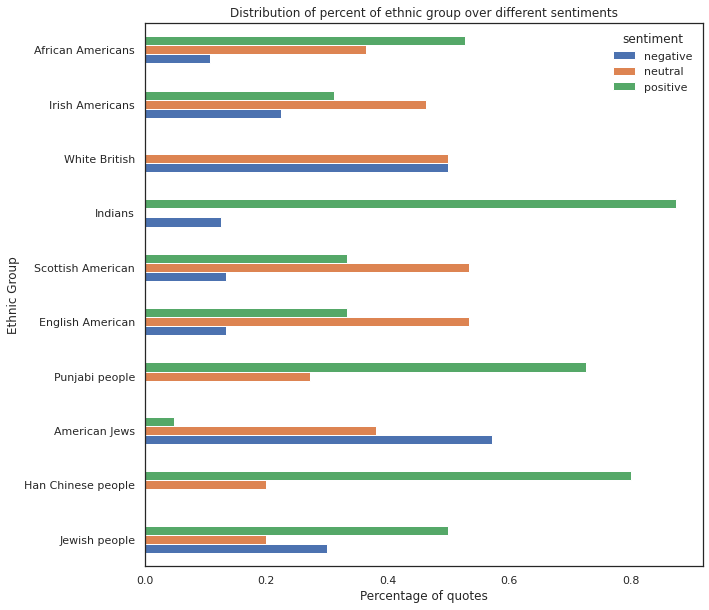

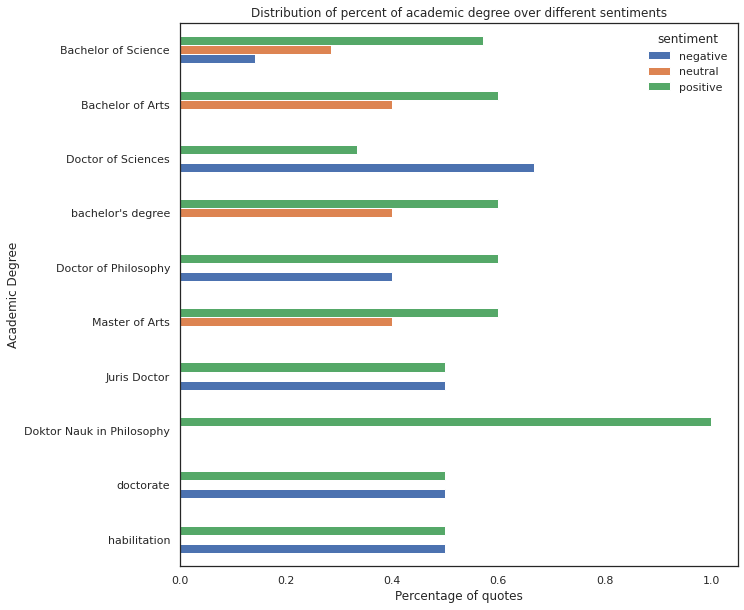

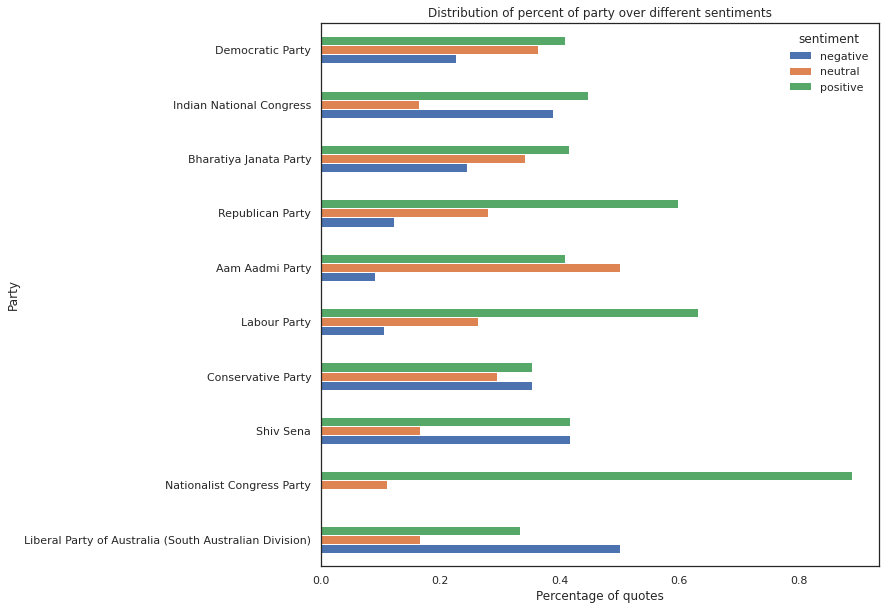

In [237]:
for index, attr_name in enumerate(['nationality', 'occupation', 'ethnic_group', 'academic_degree', 'party']):
    fig, ax = plt.subplots(figsize=(10, 10))
    
    readable_attr_name = attr_name.replace('_', ' ')

    plot_sentiment_multivalue_attribute_percentage(df, attr_name, ax=ax)
    ax.set(title=f'Distribution of percent of {readable_attr_name} over different sentiments',
          xlabel='Percentage of quotes',
          ylabel=readable_attr_name.title())
    plt.show()


# Related terms

In [35]:
from collections import Counter
from functools import reduce

from textblob import TextBlob

# Old way
# def get_word_frequencies(sentence, stop_wrods):
#     tokens = [token.lower() for token in word_tokenize(sentence)]
#     # Remove stop words and punctuation
#     tokens = filter(lambda word: word not in stop_words and word.isalnum(), tokens)
#     return Counter(tokens)

# New way
def get_word_frequencies(sentence):
#     tokens = [token.lower() for token in word_tokenize(sentence)]
#     # Remove stop words and punctuation
#     tokens = filter(lambda word: word not in stop_words and word.isalnum(), tokens)
    return Counter(TextBlob(sentence).noun_phrases)


In [36]:
word_frequencies = Counter()
for sentence_freq in map(get_word_frequencies, list(df['quotation'])):
    word_frequencies.update(sentence_freq)

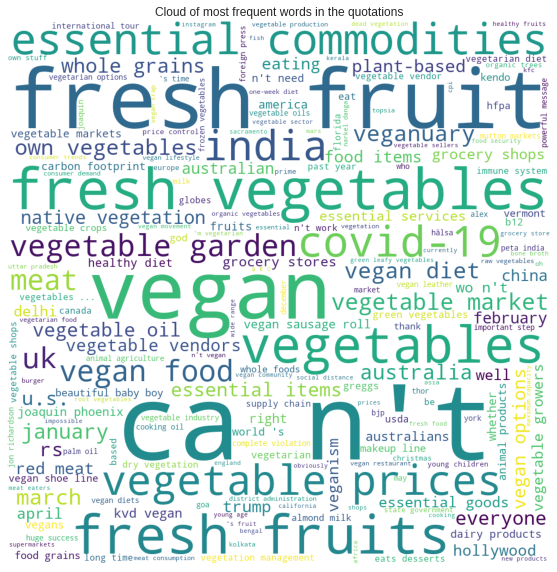

In [37]:
from wordcloud import WordCloud
from PIL import Image

USE_MASK = False # by setting to True, it will use cow mask to display wordcloud
WC_BACKGROUND = 'white'
MAX_WORDS = 200
WC_WIDTH, WC_HEIGHT = 1000, 1000
STOPWORDS = stopwords.words('english')

if USE_MASK:
    # Source: https://www.flaticon.com/free-icon/cow-silhouette_62470
    image_mask = 255 - np.array(Image.open(f'{IMG_DIR}/cow_mask.png'))
    word_cloud = WordCloud(
        background_color=WC_BACKGROUND, 
        max_words=MAX_WORDS, 
        width=WC_WIDTH, 
        height=WC_HEIGHT,
        stopwords=STOPWORDS, 
        mask=image_mask, 
        contour_width=1, 
        contour_color='green')
else:
    word_cloud = WordCloud(
        background_color=WC_BACKGROUND, 
        max_words=MAX_WORDS, 
        width=WC_WIDTH, 
        height=WC_HEIGHT,
        stopwords=STOPWORDS)

# Calculate wordcloud
wc = word_cloud.generate_from_frequencies(word_frequencies)

# Plot wordcloud
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(wc)
ax.axis('off')
ax.set(title='Cloud of most frequent words in the quotations')
plt.show()

# Tagging
---
Here we experiment tagging on our dataset.

In [3]:
from flair.models import SequenceTagger, TextClassifier
from flair.data import Sentence
from flair.embeddings import WordEmbeddings
from flair.tokenization import SegtokSentenceSplitter

In [4]:
# Load NER
tagger = SequenceTagger.load('ner')
splitter = SegtokSentenceSplitter()

2021-11-12 18:58:54,730 --------------------------------------------------------------------------------
2021-11-12 18:58:54,731 The model key 'ner' now maps to 'https://huggingface.co/flair/ner-english' on the HuggingFace ModelHub
2021-11-12 18:58:54,731  - The most current version of the model is automatically downloaded from there.
2021-11-12 18:58:54,732  - (you can alternatively manually download the original model at https://nlp.informatik.hu-berlin.de/resources/models/ner/en-ner-conll03-v0.4.pt)
2021-11-12 18:58:54,732 --------------------------------------------------------------------------------
2021-11-12 18:58:55,263 loading file /home/romain/.flair/models/ner-english/4f4cdab26f24cb98b732b389e6cebc646c36f54cfd6e0b7d3b90b25656e4262f.8baa8ae8795f4df80b28e7f7b61d788ecbb057d1dc85aacb316f1bd02837a4a4


In [5]:
full_text = '\n'.join(df['quotation'])
sentences = splitter.split(full_text)
tagger.predict(sentences)

In [6]:
spans = [el for sublist in list(map(lambda s: s.get_spans('ner'), sentences)) for el in sublist]
spans_df = pd.DataFrame([{
    'text': s.text,
    'tag': s.tag,
    'score': s.score
} for s in spans])
spans_df.head()

,text,tag,score
0,Burger Burger,ORG,0.981547
1,KVD Vegan Beauty,ORG,0.499235
2,Kat,PER,0.572307
3,Auckland,LOC,0.999819
4,Auckland,LOC,0.996379


## Most cited organizations

In the following cells, we experiment tagging and what we can learn about the cited organizations in our dataset.

In [7]:
org_spans = spans_df[spans_df['tag'] == 'ORG']

print(f"Most cited organizations (total = {len(org_spans)}):")
org_spans['text'].value_counts()[:15]

Most cited organizations (total = 610):


USDA                       10
HFPA                       10
Beyond Meat                 8
Hollywood Foreign Press     8
PETA India                  8
KFC                         7
KENDO                       7
BJP                         7
KVD Vegan Beauty            5
Hälsa                       5
APMC                        4
CBD                         4
MPC                         4
USMCA                       4
PETA                        4
Name: text, dtype: int64

These results are quite promising. We can expect to learn much more from it with the complete dataset (previous years) during the next milestone.

Also, maybe it can be interesting to also tag the context around the quotations, because sometimes speakers talk about them while they are given around the quotation. The usage of acronyms can also alter the result. That's why it can be interesting to solve this problem using for example wikidata, which contains the acronyms and alias of organizations.

## Most cited locations

In the following cells, we experiment tagging and what we can learn about the cited locations in our dataset.

In [8]:
loc_spans = spans_df[spans_df['tag'] == 'LOC']

print(f"Most cited locations (total = {len(loc_spans)}):")
loc_spans['text'].value_counts()[:15]

Most cited locations (total = 888):


India            30
UK               26
Australia        20
U.S.             17
China            14
US               12
Delhi            12
Vermont           9
Goa               8
Florida           8
Canada            8
United States     7
Europe            7
Asia              7
Kolkata           7
Name: text, dtype: int64

Same processing as before could be done here. Also, we sometimes have regions mentioned rather than country: we could use wikidata to map then to their countries for example, if we want to do a country analysis.

## Most cited persons

In the following cells, we experiment tagging and what we can learn about the cited persons in our dataset.

In [9]:
per_spans = spans_df[spans_df['tag'] == 'PER']

print(f"Most cited persons (total = {len(per_spans)}):")
per_spans['text'].value_counts()[:10]

Most cited persons (total = 551):


Trump              13
Joaquin Phoenix    12
God                10
Jon Richardson      8
Alex                8
Joaquin             8
Greggs              6
Thor                5
Alzheimer           4
Donald Trump        4
Name: text, dtype: int64

Same comments as before.

## Events tagging

We experiment events tagging.

In [10]:
# Load NER Ontonotes
ontonotes_tagger = SequenceTagger.load('ner-ontonotes')

2021-11-12 18:59:38,488 --------------------------------------------------------------------------------
2021-11-12 18:59:38,488 The model key 'ner-ontonotes' now maps to 'https://huggingface.co/flair/ner-english-ontonotes' on the HuggingFace ModelHub
2021-11-12 18:59:38,489  - The most current version of the model is automatically downloaded from there.
2021-11-12 18:59:38,489  - (you can alternatively manually download the original model at https://nlp.informatik.hu-berlin.de/resources/models/ner-ontonotes/en-ner-ontonotes-v0.4.pt)
2021-11-12 18:59:38,489 --------------------------------------------------------------------------------
2021-11-12 18:59:38,995 loading file /home/romain/.flair/models/ner-english-ontonotes/f46dcd14689a594a7dd2a8c9c001a34fd55b02fded2528410913c7e88dbe43d4.1207747bf5ae24291205b6f3e7417c8bedd5c32cacfb5a439f3eff38afda66f7


In [11]:
full_text = '\n'.join(df['quotation'])
sentences = splitter.split(full_text)
ontonotes_tagger.predict(sentences)

In [12]:
spans = [el for sublist in list(map(lambda s: s.get_spans('ner'), sentences)) for el in sublist]
spans_df = pd.DataFrame([{
    'text': s.text,
    'tag': s.tag,
    'score': s.score
} for s in spans])
spans_df.head()

,text,tag,score
0,Musk,PERSON,0.951681
1,every single day,DATE,0.914750
2,three,CARDINAL,0.999228
3,One,CARDINAL,0.998950
4,third,ORDINAL,0.999984


In [13]:
event_spans = spans_df[spans_df['tag'] == 'EVENT']

print(f"Most cited events (total = {len(event_spans)}):")
event_spans['text'].value_counts()[:10]

Most cited events (total = 38):


the UAE Innovation Month                   2
New Year                                   2
Veganuary                                  2
Annual Golden Globe Awards                 2
Olympic                                    2
Australian Open                            2
the Plant Based World Conference & Expo    2
Golden Globes                              1
the Vegan Challenge                        1
Oscars                                     1
Name: text, dtype: int64

The result is ok-tier. But we think that adding context could improve and help us to link events with our analysis.

## Most cited products

We experiment events tagging.

In [14]:
product_spans = spans_df[spans_df['tag'] == 'PRODUCT']

print(f"Most cited products (total = {len(product_spans)}):")
product_spans['text'].value_counts()[:10]

Most cited products (total = 62):


the Beyond Burger    3
Covid-19             3
Big Mac              2
Sewa                 2
Beyond Meat          2
Marmite              2
Qidali               1
Weetabix             1
Cauliflower Bites    1
Avengers             1
Name: text, dtype: int64